# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
apiKey=weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
        
    #city_url = f"{url}appid={apiKey}&q={city}"
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | nhulunbuy
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | port moresby
Processing Record 14 of Set 1 | rungata
City not found. Skipping...
Processing Record 15 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | buraydah
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | zhigansk
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | kandrian
Processing Record 22 

Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | nang rong
Processing Record 43 of Set 4 | port blair
Processing Record 44 of Set 4 | salihorsk
Processing Record 45 of Set 4 | reshetylivka
Processing Record 46 of Set 4 | kupang
Processing Record 47 of Set 4 | damaturu
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | alamos
Processing Record 0 of Set 5 | pogar
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | cerqueira cesar
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | nicoya
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | victoria
Processing Record 10 of Se

Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | chiguayante
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | sayaxche
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | laramie
Processing Record 39 of Set 8 | kodinsk
Processing Record 40 of Set 8 | saint combs
City not found. Skipping...
Processing Record 41 of Set 8 | ajdabiya
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | springfield
Processing Record 44 of Set 8 | krutikha
Processing Record 45 of Set 8 | manoharpur
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | bandarbeyla
Processing Record 48 of Set 8 | kaitangata
Processing Record 49 of Set 8 | zhezkazgan
Processing Record 0 of Set 9 | sao miguel
Processing Record 1 of Set 9 | kuala krai
City not found. S

Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | nanfeng
Processing Record 19 of Set 12 | jatai
Processing Record 20 of Set 12 | malakal
Processing Record 21 of Set 12 | selu
Processing Record 22 of Set 12 | lagos
Processing Record 23 of Set 12 | lompoc
Processing Record 24 of Set 12 | tomatlan
Processing Record 25 of Set 12 | kadhan
Processing Record 26 of Set 12 | aberdeen
Processing Record 27 of Set 12 | dargaville
Processing Record 28 of Set 12 | utiroa
City not found. Skipping...
Processing Record 29 of Set 12 | highland
Processing Record 30 of Set 12 | vung tau
Processing Record 31 of Set 12 | naryan-mar
Processing Record 32 of Set 12 | comodoro rivadavia
Processing Record 33 of Set 12 | paris
Processing Record 34 of Set 12 | puqi
Processing Record 35 of Set 12 | abu samrah
Processing Record 36 of Set 12 | eurajoki
Processing Record 37 of Set 12 | itacoatiara
Processing Record 38 of Set 12 | jaru
Processing Record 39 of Set 12 | ampanihy
Processing 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,12.06,58,75,3.60,CL,1680479400
1,rikitea,-23.1203,-134.9692,26.68,82,51,6.74,PF,1680479474
2,bluff,-46.6000,168.3333,14.89,61,75,3.94,NZ,1680479474
3,lata,40.1629,-8.3327,10.51,75,99,1.23,PT,1680479474
4,hobart,-42.8794,147.3294,16.70,65,20,4.63,AU,1680479226


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,12.06,58,75,3.60,CL,1680479400
1,rikitea,-23.1203,-134.9692,26.68,82,51,6.74,PF,1680479474
2,bluff,-46.6000,168.3333,14.89,61,75,3.94,NZ,1680479474
3,lata,40.1629,-8.3327,10.51,75,99,1.23,PT,1680479474
4,hobart,-42.8794,147.3294,16.70,65,20,4.63,AU,1680479226


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

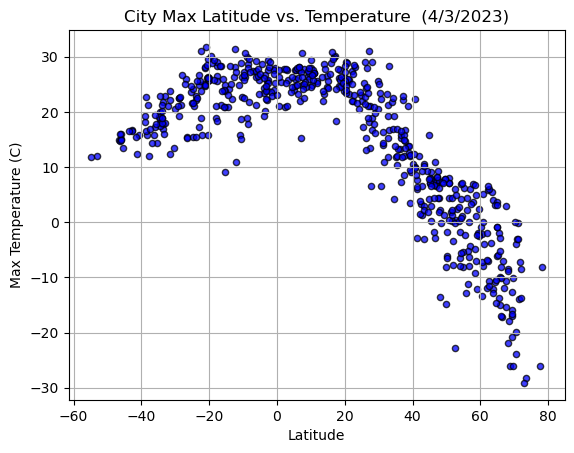

In [66]:
 # Build scatter plot for latitude vs. temperature
#plt.scatter(city_data_df['latitude'], city_data_df['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature  (4/3/2023)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

 # Save the figure
plt.savefig("output_data/Fig1.png")


 # Show plot
plt.show()



#### Latitude Vs. Humidity

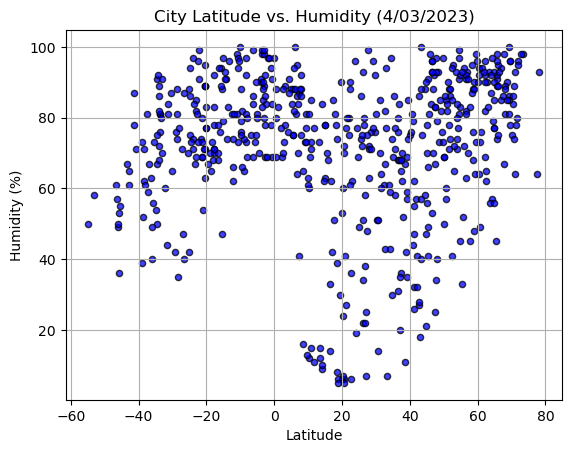

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (4/03/2023)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

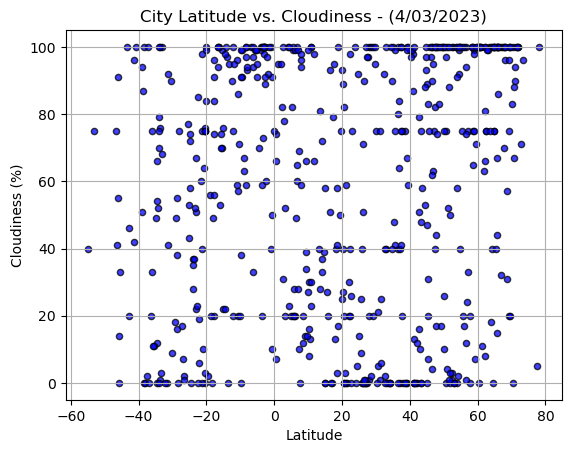

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - (4/03/2023)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

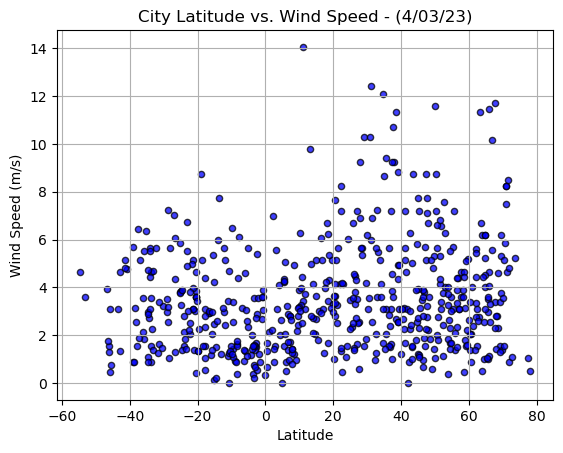

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed - (4/03/23)') 
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [179]:
# # Define a function to create Linear Regression plots

    
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lata,40.1629,-8.3327,10.51,75,99,1.23,PT,1680479474
5,leningradskiy,69.3833,178.4167,-20.86,86,100,5.33,RU,1680479474
9,ribeira grande,38.5167,-28.7000,13.76,67,75,2.68,PT,1680479474
13,cherskiy,68.7500,161.3000,-26.07,90,57,2.29,RU,1680479475
14,buraydah,26.3260,43.9750,15.25,22,0,3.30,SA,1680479475


In [181]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,12.06,58,75,3.60,CL,1680479400
1,rikitea,-23.1203,-134.9692,26.68,82,51,6.74,PF,1680479474
2,bluff,-46.6000,168.3333,14.89,61,75,3.94,NZ,1680479474
4,hobart,-42.8794,147.3294,16.70,65,20,4.63,AU,1680479226
6,atuona,-9.8000,-139.0333,27.29,76,38,6.50,PF,1680479474


###  Temperature vs. Latitude Linear Regression Plot

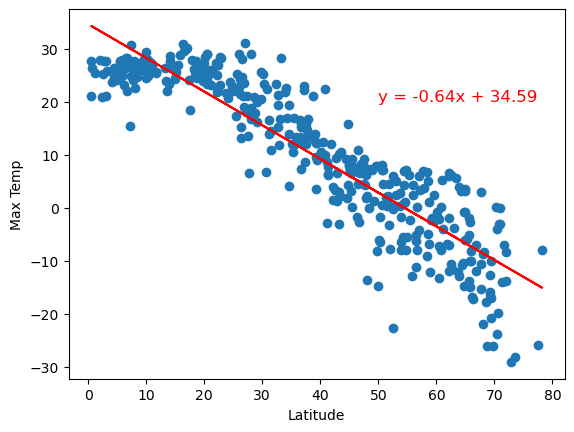

In [199]:
# Linear regression on Northern Hemisphere
X_axis = northern_hemi_df['Lat']
Y_axis = northern_hemi_df['Max Temp']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (50, 20),fontsize = 12, color = 'r')
plt.show()



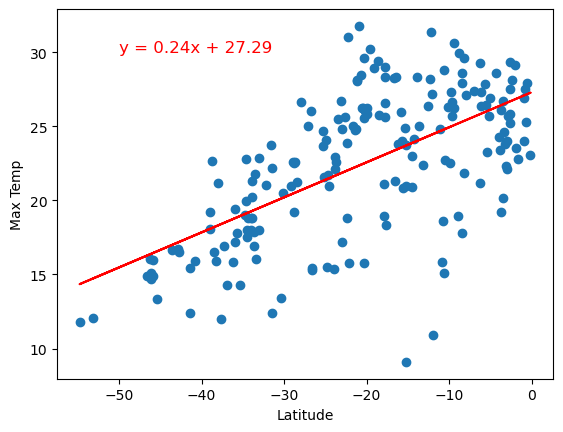

In [200]:
# Linear regression on Southern Hemisphere
X_axis = southern_hemi_df['Lat']
Y_axis = southern_hemi_df['Max Temp']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (-50, 30),fontsize = 12, color = 'r')
plt.show()

The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. This means that in the southern hemisphere latitudes decrease as we move away from the equator, and in the northern hemisphere as latitude increases you move further away from the equator.  For the southern hemisphere there is a positive correlation between latitude and maximum temperature. However, the northern hemisphere has a significant negative correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

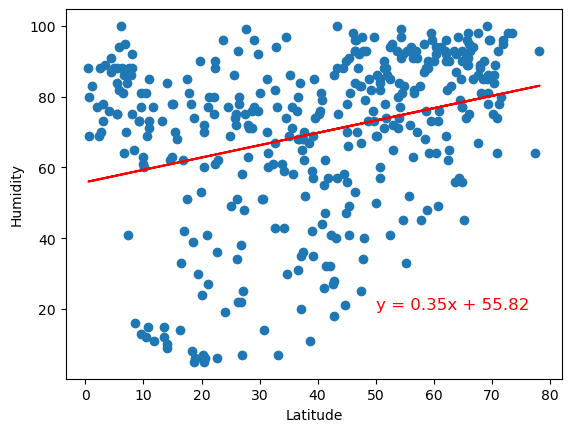

In [202]:
# Northern Hemisphere

X_axis = northern_hemi_df['Lat']
Y_axis = northern_hemi_df['Humidity']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (50, 20),fontsize = 12, color = 'r')
plt.show()


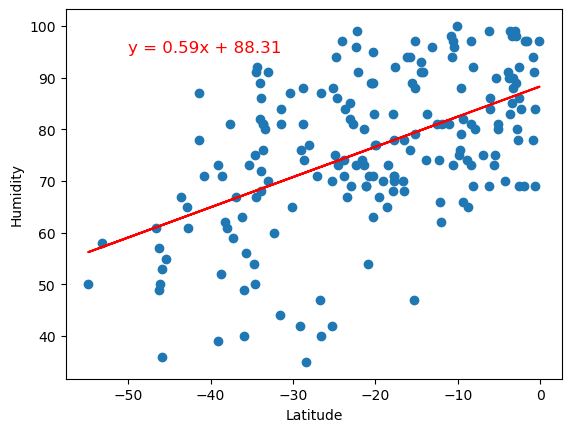

In [205]:
# Southern Hemisphere

X_axis = southern_hemi_df['Lat']
Y_axis = southern_hemi_df['Humidity']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (-50, 95),fontsize = 12, color = 'r')
plt.show()

As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere. 


### Cloudiness vs. Latitude Linear Regression Plot

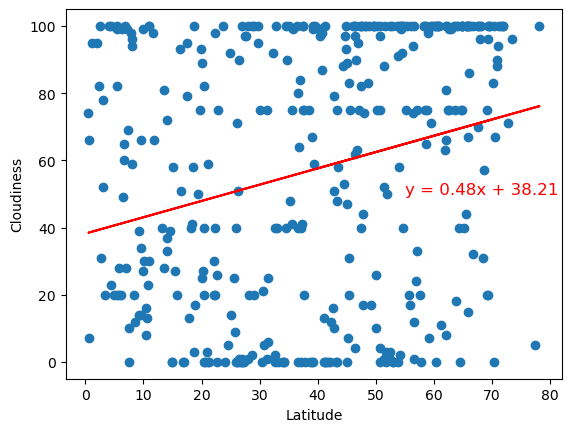

In [208]:
# Northern Hemisphere
X_axis = northern_hemi_df['Lat']
Y_axis = northern_hemi_df['Cloudiness']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (55, 50),fontsize = 12, color = 'r')
plt.show()


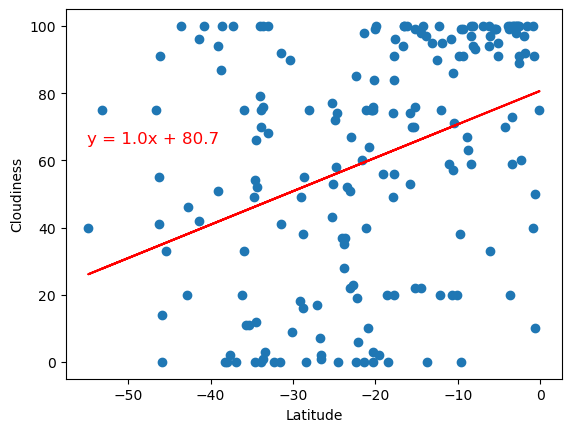

In [211]:
# Southern Hemisphere
X_axis = southern_hemi_df['Lat']
Y_axis = southern_hemi_df['Cloudiness']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (-55, 65),fontsize = 12, color = 'r')
plt.show()

The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres.  There is no relationship between latitude and cloudiness in the southern hemisphere or The northern hemisphere. 



### Wind Speed vs. Latitude Linear Regression Plot

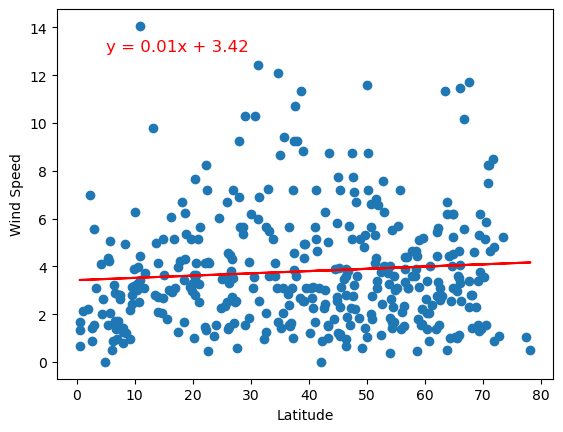

In [213]:
# Northern Hemisphere
X_axis = northern_hemi_df['Lat']
Y_axis = northern_hemi_df['Wind Speed']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (5, 13),fontsize = 12, color = 'r')
plt.show()


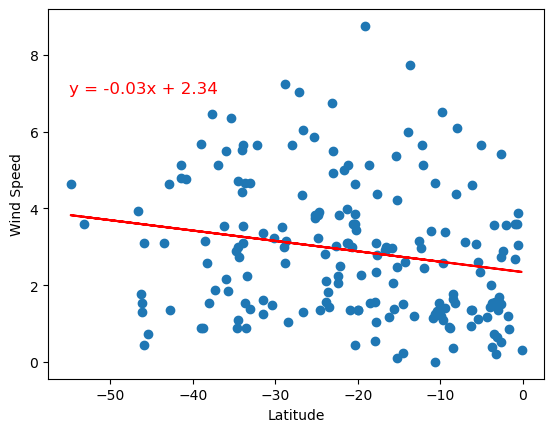

In [215]:
# Southern Hemisphere
X_axis = southern_hemi_df['Lat']
Y_axis = southern_hemi_df['Wind Speed']

plt.scatter(X_axis,Y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
regress_values = X_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X_axis,regress_values,"r-")
plt.annotate(line_eq, (-55, 7),fontsize = 12, color = 'r')
plt.show()

  There only appears to be a weak correlation between increasing latitude and wind speed in the northern hemisphere.  The southern hemisphere had no correlation between the increasing latitude and wind speed.

